In [1]:
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# For text processing stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# For vectorizing text data
from sklearn.feature_extraction.text import TfidfVectorizer

# For train-test split and evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\saich\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [2]:
# 1. Load and Clean the Data

# Read the dataset
data = pd.read_csv('Datasets/spam.csv', encoding='latin-1')

# Drop unnecessary columns and rename the remaining ones
data = data.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
data = data.rename(columns={"v2": "text", "v1": "label"})
data.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [3]:
# 2. Preprocess the Text Data

def process_text_data(text):
    # Lowercase the text
    text = text.lower()
    # Remove usernames (if any)
    text = re.sub(r'@[^\s]+', '', text)
    # Remove URLs
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', ' ', text)
    # Remove digits
    text = re.sub(r"\d+", " ", text)
    # Remove HTML encoded characters
    text = re.sub(r"&quot;", " ", text)
    # Remove single characters
    text = re.sub(r"\b[a-zA-Z]\b", "", text)
    # Remove punctuation
    text = re.sub(r"[^\w\s]", " ", text)
    # Remove extra spaces
    text = re.sub(r"\s+", " ", text)
    return text.strip()

# Apply processing to the text column
data['processed_text'] = data['text'].apply(process_text_data)

# Remove stopwords to reduce noise
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return " ".join(words)

data['processed_text'] = data['processed_text'].apply(remove_stopwords)
print(data['processed_text'])

0       go jurong point crazy available bugis great wo...
1                                   ok lar joking wif oni
2       free entry wkly comp win fa cup final tkts st ...
3                           dun say early hor already say
4                  nah think goes usf lives around though
                              ...                        
5567    nd time tried contact å pound prize claim easy...
5568                           ì_ going esplanade fr home
5569                                pity mood suggestions
5570    guy bitching acted like interested buying some...
5571                                       rofl true name
Name: processed_text, Length: 5572, dtype: object


In [4]:
# 3. Convert Labels to Numerical Values

# Replace 'ham' with 0 and 'spam' with 1
data = data.replace(['ham', 'spam'], [0, 1])

# 4. Vectorize the Text Data using TF-IDF

vectorizer = TfidfVectorizer()
features = vectorizer.fit_transform(data['processed_text'])

data.head(10)


,label,text,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis great wo...
1,0,Ok lar... Joking wif u oni...,ok lar joking wif oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,0,U dun say so early hor... U c already then say...,dun say early hor already say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goes usf lives around though
5,1,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back like fun st...
6,0,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,0,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,1,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,1,Had your mobile 11 months or more? U R entitle...,mobile months entitled update latest colour mo...


In [5]:
ham_words = ''
spam_words = ''
for val in data[data['label'] == 1].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in data[data['label'] == 0].text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [7]:
spam_cloud=WordCloud(width=400,height=400).generate(spam_words)
ham_cloud=WordCloud(width=400,height=400).generate(ham_words)

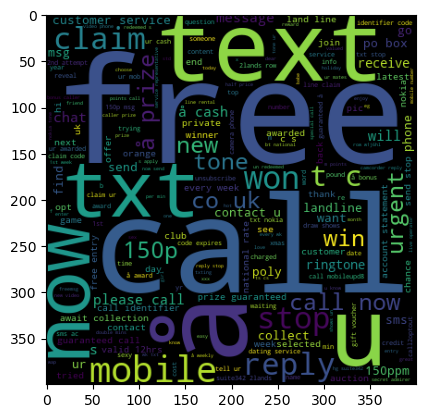

In [8]:
plt.imshow(spam_cloud)

In [9]:
# 5. Split the Dataset into Training and Testing Sets

X_train, X_test, y_train, y_test = train_test_split(features, data['label'], test_size=0.15, random_state=111)
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)
# 6. Train a Logistic Regression Classifier

# Initialize Logistic Regression (easy and interpretable)
clf = LogisticRegression(solver='liblinear', penalty='l1')
clf.fit(X_train, y_train)


(4736, 7544)
(836, 7544)
(4736,)
(836,)


LogisticRegression(penalty='l1', solver='liblinear')

In [10]:
# 7. Evaluate the Model
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Print accuracy and a detailed classification report
print(confusion_matrix(y_test,y_pred))
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


[[718   7]
 [ 25  86]]
Test Accuracy: 0.9617224880382775
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       725
           1       0.92      0.77      0.84       111

    accuracy                           0.96       836
   macro avg       0.95      0.88      0.91       836
weighted avg       0.96      0.96      0.96       836

